In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('ML_Houses_dataset.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
livecode_data = data[['GrLivArea','SalePrice']]
livecode_data.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


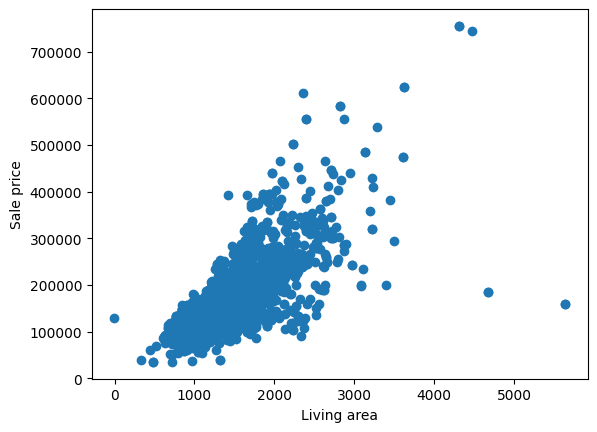

In [6]:
# Plot Living area vs Sale price
plt.scatter(data['GrLivArea'], data['SalePrice'])
# Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")
plt.show()

# Linear Regression

A Linear Regression (OLS) maps a linear relationship between the input X and the output y.<br>
It optimizes slope a and intercept b by reducing the residuals between the actual y and the predicted y.

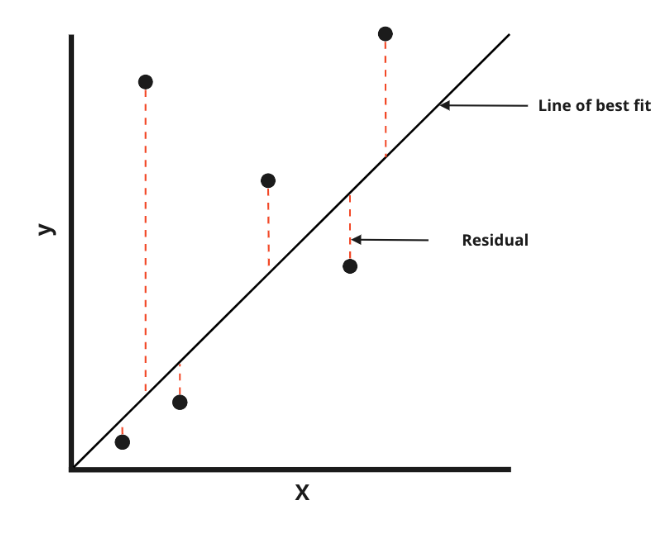

# Logistic Regression

Despite having "regression" in its name, Logistic Regression is actually a classifier.<br>
It uses a Sigmoid Function to map the probability of belonging to a class.

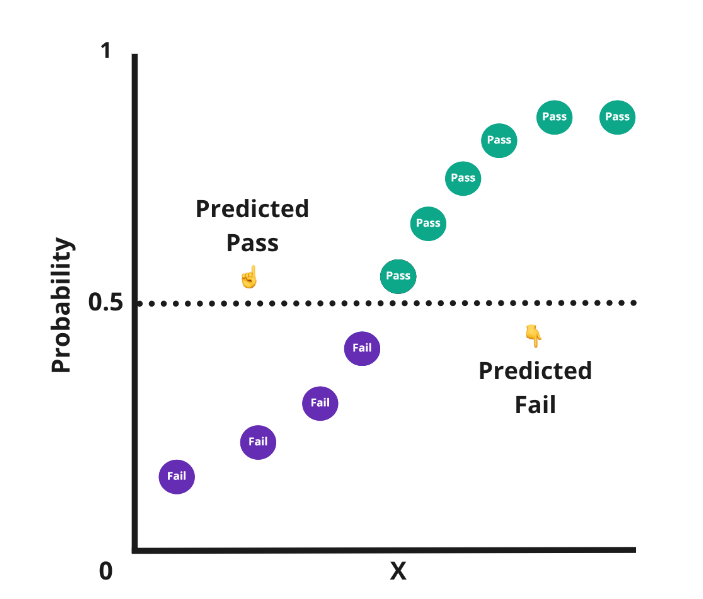

In [7]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model (💡 in Sklearn often called "estimator")
model = LinearRegression()

# Define X and y
X = data[['GrLivArea']]
y = data['SalePrice']

# Train the model on the data
model.fit(X, y)

LinearRegression()

In [8]:
#check X
X

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198
...,...
1755,2073
1756,1125
1757,1640
1758,2229


In [9]:
#check y
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1755    210000
1756    155000
1757    173000
1758    104000
1759    108000
Name: SalePrice, Length: 1760, dtype: int64

In [10]:
# slope (a) 
model.coef_

array([105.00927564])

In [11]:
#intercept (b)
model.intercept_

22104.12101002081

### Scoring
Each Scikit-learn algorithm has a default scoring metric.<br>

LinearRegression uses the Coefficient of determination (R2) by default.<br>

- R2 represents the proportion of the variance of the target explained by the features.
- The score typically varies between 0 and 1.
- The higher score the better the model.

In [12]:
# checks performance of model -> scoring
# R2 represents the proportion of the variance of the target
# explained by the features (varies between 0 and 1)
model.score(X, y)

0.48960426399689116

In [13]:
# predicting -> Used to predict new data
# an apartment with a surface of 1000 ft2 has a predicted value of
# about 127K
model.predict([[1000]])

/home/tatchiwiggers/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([127113.39664561])

In [14]:
# holdout method
from sklearn.model_selection import train_test_split

### Sklearn modeling flow

1. Import the model: from sklearn import model
2. Instantiate the model: model = model()
3. Train the model: model.fit(X, y)
4. Evaluate the model: model.score(new_X, new_y)
5. Make predictions: model.predict(new_X)

### Generalization
The performance of a Machine Learning model is evaluated on its ability to generalize when predicting unseen data.

The Holdout Method
The Holdout Method is used to evaluate a model's ability to generalize. It consists of splitting the dataset into two sets:

Training set (70%)<br>
Testing set (30%)

In [15]:
livecode_data.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [17]:
# Splitting
from sklearn.model_selection import train_test_split

# Ready X and y
X = livecode_data[['GrLivArea']]
y = livecode_data['SalePrice']

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
# Training and scoring

# Instantiate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Test data
model.score(X_test,y_test)

0.49855961359932144

 ### Data split is random
 #### Limitations of the Holdout Method: Different random splits will create different results

In [20]:
### RUN THIS CELL MULTIPLE TIMES TO SEE DIFFERENT SCORES

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Test data
model.score(X_test,y_test)

0.4378928231013881

We can use the random_state option, but we can be easily tempted to pick one with the best score

#### Lose information
The data in the Test set is not used to train the model<br>
If you have a small dataset, that loss could be significant<br>
❓ How would you solve that issue?<br>

👉 Average the scores of multiple holdout splits.

### K-Fold Cross Validation
The dataset is split into K number of folds<br>
For each split, a sub model is trained and scored<br>
The average score of all sub models is the cross-validated score of the model

In [22]:
# croos-validate

from sklearn.model_selection import cross_validate

# Instantiate model
model = LinearRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Scores
cv_results['test_score']

# Mean of scores
cv_results['test_score'].mean()

0.4863112208425962

⚠️ Cross validation does not output a trained model, it only scores a hypothetical model trained on the entire dataset.